In [78]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split as tts
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import math
%matplotlib notebook

In [2]:
data=pd.read_csv("/home/krulvain/datasets/weatherww2/Summary of Weather.csv")

/home/krulvain/ml/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3049: DtypeWarning: Columns (7,8,18,25) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
data.head()

,STA,Date,Precip,WindGustSpd,MaxTemp,MinTemp,MeanTemp,Snowfall,PoorWeather,YR,...,FB,FTI,ITH,PGT,TSHDSBRSGF,SD3,RHX,RHN,RVG,WTE
0,10001,1942-7-1,1.016,NaN,25.555556,22.222222,23.888889,0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,10001,1942-7-2,0,NaN,28.888889,21.666667,25.555556,0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,10001,1942-7-3,2.54,NaN,26.111111,22.222222,24.444444,0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,10001,1942-7-4,2.54,NaN,26.666667,22.222222,24.444444,0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,10001,1942-7-5,0,NaN,26.666667,21.666667,24.444444,0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
data.columns

Index(['STA', 'Date', 'Precip', 'WindGustSpd', 'MaxTemp', 'MinTemp',
       'MeanTemp', 'Snowfall', 'PoorWeather', 'YR', 'MO', 'DA', 'PRCP', 'DR',
       'SPD', 'MAX', 'MIN', 'MEA', 'SNF', 'SND', 'FT', 'FB', 'FTI', 'ITH',
       'PGT', 'TSHDSBRSGF', 'SD3', 'RHX', 'RHN', 'RVG', 'WTE'],
      dtype='object')

In [5]:
data.columns=[x.lower() for x in data.columns]

In [6]:
data.columns

Index(['sta', 'date', 'precip', 'windgustspd', 'maxtemp', 'mintemp',
       'meantemp', 'snowfall', 'poorweather', 'yr', 'mo', 'da', 'prcp', 'dr',
       'spd', 'max', 'min', 'mea', 'snf', 'snd', 'ft', 'fb', 'fti', 'ith',
       'pgt', 'tshdsbrsgf', 'sd3', 'rhx', 'rhn', 'rvg', 'wte'],
      dtype='object')

In [86]:
data.describe()

,sta,windgustspd,maxtemp,mintemp,meantemp,yr,mo,da,dr,spd,...,ft,fb,fti,ith,pgt,sd3,rhx,rhn,rvg,wte
count,119040.000000,532.000000,119040.000000,119040.000000,119040.000000,119040.000000,119040.000000,119040.000000,533.000000,532.000000,...,0.0,0.0,0.0,0.0,525.000000,0.0,0.0,0.0,0.0,0.0
mean,29659.435795,37.774534,27.045111,17.789511,22.411631,43.805284,6.726016,15.797530,26.998124,20.396617,...,NaN,NaN,NaN,NaN,12.085333,NaN,NaN,NaN,NaN,NaN
std,20953.209402,10.297808,8.717817,8.334572,8.297982,1.136718,3.425561,8.794541,15.221732,5.560371,...,NaN,NaN,NaN,NaN,5.731328,NaN,NaN,NaN,NaN,NaN
min,10001.000000,18.520000,-33.333333,-38.333333,-35.555556,40.000000,1.000000,1.000000,2.000000,10.000000,...,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN
25%,11801.000000,29.632000,25.555556,15.000000,20.555556,43.000000,4.000000,8.000000,11.000000,16.000000,...,NaN,NaN,NaN,NaN,8.500000,NaN,NaN,NaN,NaN,NaN
50%,22508.000000,37.040000,29.444444,21.111111,25.555556,44.000000,7.000000,16.000000,32.000000,20.000000,...,NaN,NaN,NaN,NaN,11.600000,NaN,NaN,NaN,NaN,NaN
75%,33501.000000,43.059000,31.666667,23.333333,27.222222,45.000000,10.000000,23.000000,34.000000,23.250000,...,NaN,NaN,NaN,NaN,15.000000,NaN,NaN,NaN,NaN,NaN
max,82506.000000,75.932000,50.000000,34.444444,40.000000,45.000000,12.000000,31.000000,78.000000,41.000000,...,NaN,NaN,NaN,NaN,23.900000,NaN,NaN,NaN,NaN,NaN


In [7]:
newdata=data.drop(['date','yr','da','dr','spd','max','min','mea','snd','ft','fb','fti','ith','tshdsbrsgf','pgt','sd3','rhn','rvg','wte'],axis=1)                                       

In [8]:
newdata.drop(['rhx'],axis=1,inplace=True)

In [9]:
newdata.drop(['snowfall'],axis=1,inplace=True)

In [10]:
newdata.drop(['precip','windgustspd'],axis=1,inplace=True)

In [11]:
newdata.head()

,sta,maxtemp,mintemp,meantemp,poorweather,mo,prcp,snf
0,10001,25.555556,22.222222,23.888889,NaN,7,0.04,0
1,10001,28.888889,21.666667,25.555556,NaN,7,0,0
2,10001,26.111111,22.222222,24.444444,NaN,7,0.1,0
3,10001,26.666667,22.222222,24.444444,NaN,7,0.1,0
4,10001,26.666667,21.666667,24.444444,NaN,7,0,0


In [12]:
newdata.dtypes

sta              int64
maxtemp        float64
mintemp        float64
meantemp       float64
poorweather     object
mo               int64
prcp            object
snf             object
dtype: object

In [13]:
newdata["poorweather"].fillna(0,inplace=True)

In [14]:
newdata.isnull().values.any()

True

In [15]:
newdata.head(1)

,sta,maxtemp,mintemp,meantemp,poorweather,mo,prcp,snf
0,10001,25.555556,22.222222,23.888889,0,7,0.04,0


In [16]:
newdata.to_csv("/home/krulvain/datasets/weatherww2/part_cleaned.csv")

In [17]:
newdata.loc[newdata.prcp=="T","prcp"]=np.float64(0)

In [18]:
newdata.head(10)

,sta,maxtemp,mintemp,meantemp,poorweather,mo,prcp,snf
0,10001,25.555556,22.222222,23.888889,0,7,0.04,0
1,10001,28.888889,21.666667,25.555556,0,7,0,0
2,10001,26.111111,22.222222,24.444444,0,7,0.1,0
3,10001,26.666667,22.222222,24.444444,0,7,0.1,0
4,10001,26.666667,21.666667,24.444444,0,7,0,0
5,10001,26.666667,21.666667,24.444444,0,7,0,0
6,10001,28.333333,22.777778,25.555556,0,7,0,0
7,10001,26.666667,22.222222,24.444444,0,7,0.14,0
8,10001,27.222222,22.777778,25.000000,0,7,0,0
9,10001,25.555556,21.666667,23.333333,0,7,0.14,0


In [19]:
newdata.head()

,sta,maxtemp,mintemp,meantemp,poorweather,mo,prcp,snf
0,10001,25.555556,22.222222,23.888889,0,7,0.04,0
1,10001,28.888889,21.666667,25.555556,0,7,0,0
2,10001,26.111111,22.222222,24.444444,0,7,0.1,0
3,10001,26.666667,22.222222,24.444444,0,7,0.1,0
4,10001,26.666667,21.666667,24.444444,0,7,0,0


In [20]:
newdata.loc[newdata.poorweather ==0,"poorweather"]=np.float64(0)

In [21]:
newdata.loc[newdata.poorweather==1,"poorweather"]=np.float64(1)

In [22]:
newdata.loc[newdata.poorweather !=(np.float64(1) and np.float64(0)),"poorweather"]=np.float64(1)

In [24]:
newdata.head()

,sta,maxtemp,mintemp,meantemp,poorweather,mo,prcp,snf
0,10001,25.555556,22.222222,23.888889,0,7,0.04,0
1,10001,28.888889,21.666667,25.555556,0,7,0,0
2,10001,26.111111,22.222222,24.444444,0,7,0.1,0
3,10001,26.666667,22.222222,24.444444,0,7,0.1,0
4,10001,26.666667,21.666667,24.444444,0,7,0,0


In [25]:
newdata=newdata.astype(np.float64)

ValueError: could not convert string to float: 'T'

In [26]:
newdata.isnull().values.any()

True

In [27]:
newdata.dtypes

sta              int64
maxtemp        float64
mintemp        float64
meantemp       float64
poorweather      int64
mo               int64
prcp            object
snf             object
dtype: object

In [28]:
newdata.loc[newdata.snf=="T","snf"]=np.float64(0)

In [29]:
newdata[['prcp']]=newdata[['prcp']].astype(np.float64)

In [30]:
newdata.dtypes

sta              int64
maxtemp        float64
mintemp        float64
meantemp       float64
poorweather      int64
mo               int64
prcp           float64
snf             object
dtype: object

In [31]:
newdata[['snf']]=newdata[['snf']].astype(np.float64)

In [32]:
newdata.astype(np.float64)

,sta,maxtemp,mintemp,meantemp,poorweather,mo,prcp,snf
0,10001.0,25.555556,22.222222,23.888889,0.0,7.0,0.04,0.0
1,10001.0,28.888889,21.666667,25.555556,0.0,7.0,0.00,0.0
2,10001.0,26.111111,22.222222,24.444444,0.0,7.0,0.10,0.0
3,10001.0,26.666667,22.222222,24.444444,0.0,7.0,0.10,0.0
4,10001.0,26.666667,21.666667,24.444444,0.0,7.0,0.00,0.0
5,10001.0,26.666667,21.666667,24.444444,0.0,7.0,0.00,0.0
6,10001.0,28.333333,22.777778,25.555556,0.0,7.0,0.00,0.0
7,10001.0,26.666667,22.222222,24.444444,0.0,7.0,0.14,0.0
8,10001.0,27.222222,22.777778,25.000000,0.0,7.0,0.00,0.0
9,10001.0,25.555556,21.666667,23.333333,0.0,7.0,0.14,0.0


In [33]:
newdata.dtypes

sta              int64
maxtemp        float64
mintemp        float64
meantemp       float64
poorweather      int64
mo               int64
prcp           float64
snf            float64
dtype: object

In [34]:
newdata.drop(['meantemp'],axis=1,inplace=True)

In [35]:
newdata.columns

Index(['sta', 'maxtemp', 'mintemp', 'poorweather', 'mo', 'prcp', 'snf'], dtype='object')

In [36]:
newdata=newdata[['maxtemp','sta','mintemp','poorweather','mo','prcp','snf']]

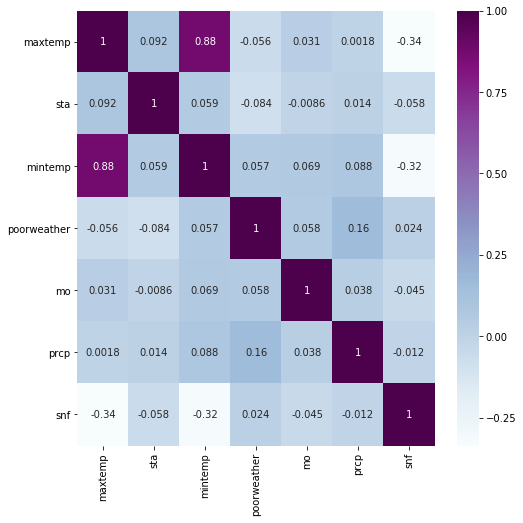

In [37]:
plt.figure(figsize=(8,8))
sns.heatmap(newdata.corr(),annot=True,cmap='BuPu')

In [47]:
npdata=newdata.to_numpy()

In [48]:
npdata.shape

(119040, 7)

In [50]:
sum(np.isnan(npdata))

array([   0,    0,    0,    0,    0, 1932, 1163])

In [51]:
sum(np.isinf(npdata))

array([0, 0, 0, 0, 0, 0, 0])

In [52]:
newdata.fillna(np.float64(0),inplace=True)

In [67]:
newdata.to_csv('/home/krulvain/datasets/weatherww2/cleaned.csv')

In [87]:
newdata.describe()

,maxtemp,sta,mintemp,poorweather,mo,prcp,snf
count,119040.000000,119040.000000,119040.000000,119040.000000,119040.000000,119040.000000,119040.000000
mean,27.045111,29659.435795,17.789511,0.287609,6.726016,0.126993,0.009569
std,8.717817,20953.209402,8.334572,0.452650,3.425561,0.425238,0.102888
min,-33.333333,10001.000000,-38.333333,0.000000,1.000000,0.000000,0.000000
25%,25.555556,11801.000000,15.000000,0.000000,4.000000,0.000000,0.000000
50%,29.444444,22508.000000,21.111111,0.000000,7.000000,0.000000,0.000000
75%,31.666667,33501.000000,23.333333,1.000000,10.000000,0.030000,0.000000
max,50.000000,82506.000000,34.444444,1.000000,12.000000,12.100000,3.400000


In [53]:
npdata=newdata.to_numpy()

In [54]:
sum(np.isnan(npdata))

array([0, 0, 0, 0, 0, 0, 0])

In [55]:
target=npdata[:,:1]

In [56]:
target.shape

(119040, 1)

In [57]:
features=npdata[:,1:]

In [63]:
trn_inp,tes_inp,trn_out,tes_out=tts(features,target,stratify=features[:,0],random_state=0)

In [61]:
print(features[:,0])

[10001. 10001. 10001. ... 82506. 82506. 82506.]


In [64]:
linreg=LinearRegression()

In [65]:
linreg.fit(trn_inp,trn_out)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [68]:
linreg.coef_

array([[ 1.24435448e-05,  9.13661545e-01, -1.75232814e+00,
        -5.82874868e-02, -1.15764051e+00, -4.25844158e+00]])

In [69]:
linreg.intercept_

array([11.50262998])

In [74]:
pre_tes=linreg.predict(tes_inp)

In [75]:
print("r2 score ={}".format(r2_score(tes_out,pre_tes)))

r2 score =0.7893402992166763


In [76]:
pre_trn=linreg.predict(trn_inp)

In [77]:
print("r2 score training={}".format(r2_score(trn_out,pre_trn)))

r2 score training=0.7902920089982226


In [79]:
print("rmse value={}".format(math.sqrt(mean_squared_error(tes_out,pre_tes))))

rmse value=3.989287476999819


In [80]:
test=np.copy(npdata)

In [84]:
res=pd.DataFrame({"Actual":tes_out.flatten(),"Predicted":pre_tes.flatten()})

In [85]:
res

,Actual,Predicted
0,25.000000,23.228715
1,22.777778,24.043721
2,31.111111,29.547169
3,38.333333,23.679224
4,34.444444,25.743399
5,28.888889,34.125241
6,26.666667,29.079869
7,11.111111,17.941776
8,24.444444,27.965112
9,19.444444,25.328766


rmse is 14 % of the mean


In [88]:
newdata.columns

Index(['maxtemp', 'sta', 'mintemp', 'poorweather', 'mo', 'prcp', 'snf'], dtype='object')

In [89]:
newdata.drop(['poorweather'],inplace=True,axis=1)

In [90]:
new_linreg=LinearRegression()

In [91]:
newdata.head(1)

,maxtemp,sta,mintemp,mo,prcp,snf
0,25.555556,10001,22.222222,7,0.04,0.0


In [94]:
targetn=newdata.iloc[:,:1]
featuresn=newdata.iloc[:,1:]

In [95]:
trn_inpn,tes_inpn,trn_outn,tes_outn=tts(featuresn,targetn,stratify=featuresn['sta'],random_state=0)

In [100]:
new_linreg.fit(trn_inpn,trn_outn)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [101]:
pre_tesn=new_linreg.predict(tes_inpn)

In [103]:
print("r2 score ={}".format(r2_score(tes_outn,pre_tesn)))

r2 score =0.7810408508893637


In [104]:
print("rmse value={}".format(math.sqrt(mean_squared_error(tes_outn,pre_tesn))))

rmse value=4.067112172089313


we notice an increase in rmse value with dropping 'poorweather' feature , which indicates poorweather is a predictor for the target(also noticeable in the heatmap).

other features were dropped because 
1)They had manny missing values ,which were difficult to compensate for.
2)The features were repeated (same feature in different unit of measurement).
3)Mean temperature was dropped since it was highly correlated with min temperature , which would have caused multicollinearity issues.